# Библиотеки для анализа данных. Pandas.

## Курс "Машинное обучение", программа AI Masters

## Илья Карчмит, Краснов Александр


В частности, в ноутбуке рассматриваются следующие темы:

* Базовый функционал Pandas. Встроенные функции и типы

In [1]:
import pandas as pd
import numpy as np

## Quick start в Pandas

<img src="https://pythongis.org/_images/pandas-structures-annotated.png" style="width: 600px">

In [2]:
# pd.Series - набор значений с индексами:
series_without_index = pd.Series([1, 2, 3, 4])
series_with_index = pd.Series(np.random.randn(5), index=["a", "b", "c", "d", "e"])
series_from_dict = pd.Series({"a": 0.0, "b": 1.0, "c": 2.0}, index=["b", "c", "d", "a", "k"])

from IPython.display import display

display(series_with_index, series_from_dict)

a    2.211674
b    0.357963
c   -1.107308
d    0.477782
e   -0.570546
dtype: float64

b    1.0
c    2.0
d    NaN
a    0.0
k    NaN
dtype: float64

In [3]:
# Над несколькими pd.Series можно совершать операции даже если их индексы отличаются:
series_with_index + series_from_dict

a    2.211674
b    1.357963
c    0.892692
d         NaN
e         NaN
k         NaN
dtype: float64

In [4]:
# с Series можно работать как со столбцом:
print(series_with_index[3]) 

print(series_with_index[[2, 3]])

0.47778231264726634
c   -1.107308
d    0.477782
dtype: float64


In [5]:
# Сделать срез из Series

# Выбрать конкретные строки:
display(series_with_index[[2, 3]])

# Применить маску:
display(series_with_index[series_with_index > 0])

c   -1.107308
d    0.477782
dtype: float64

a    2.211674
b    0.357963
d    0.477782
dtype: float64

In [6]:
# Применить функцию к pd.Series:

display(series_with_index.apply(lambda x: x + 1))

display(series_with_index.apply(np.sqrt))

def subtract_custom_value(x, custom_value):
    return x - custom_value


display(series_with_index.apply(subtract_custom_value, args=(5,)))

a    3.211674
b    1.357963
c   -0.107308
d    1.477782
e    0.429454
dtype: float64

a    1.487170
b    0.598300
c         NaN
d    0.691218
e         NaN
dtype: float64

a   -2.788326
b   -4.642037
c   -6.107308
d   -4.522218
e   -5.570546
dtype: float64

In [7]:
# Агрегация pd.Series: 
display(
    series_with_index.sum(), 
    series_with_index.count(),
    series_with_index.mean(),
    series_with_index.max()
)

1.369564925145439

5

0.2739129850290878

2.2116738070483466

In [8]:
# pd.DataFrame - набор pd.Series с одинаковыми индексами:
series_with_index = pd.Series(np.random.randn(5), index=["a", "b", "c", "d", "e"])
series_from_dict = pd.Series({"a": 0.0, "b": 1.0, "c": 2.0}, index=["b", "c", "d", "a", "k"])

df_from_dict = pd.DataFrame({'column1': series_with_index, 'column2': series_from_dict})
df_from_dict

,column1,column2
a,0.622634,0.0
b,-1.096436,1.0
c,0.181002,2.0
d,-0.759437,NaN
e,0.084843,NaN
k,NaN,NaN


In [9]:
# Выводим индексы, столбцы и значения:
display(
    df_from_dict.index,
    df_from_dict.columns,
    df_from_dict.values
)

Index(['a', 'b', 'c', 'd', 'e', 'k'], dtype='object')

Index(['column1', 'column2'], dtype='object')

array([[ 0.62263415,  0.        ],
       [-1.09643645,  1.        ],
       [ 0.18100243,  2.        ],
       [-0.75943699,         nan],
       [ 0.08484264,         nan],
       [        nan,         nan]])

In [10]:
# И индексы, и столбцы можно менять:
df_from_dict.columns = ['super_column1', 'super_column2'] # еще - df.rename
df_from_dict.index = np.arange(len(df_from_dict)) * 10 # еще - df.set_index
df_from_dict

,super_column1,super_column2
0,0.622634,0.0
10,-1.096436,1.0
20,0.181002,2.0
30,-0.759437,NaN
40,0.084843,NaN
50,NaN,NaN


In [11]:
# Выбор строчки по индексу/номеру строки:
display(
    df_from_dict.loc[10],
    df_from_dict.iloc[2]
)

super_column1   -1.096436
super_column2    1.000000
Name: 10, dtype: float64

super_column1    0.181002
super_column2    2.000000
Name: 20, dtype: float64

In [12]:
# Агрегация: 
display(
    df_from_dict.sum(axis = 1),
    df_from_dict.sum(axis = 0)
)

0     0.622634
10   -0.096436
20    2.181002
30   -0.759437
40    0.084843
50    0.000000
dtype: float64

super_column1   -0.967394
super_column2    3.000000
dtype: float64

## Загрузка данных с помощью pandas

### Titanic

Говорим про: 
- Чтение из csv
- Прописывание типов и индексов
- `pd.concat`

In [13]:
ttn_tr = pd.read_csv('titanic/train.csv')

ttn_tr.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [14]:
ttn_tr.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 315.0 KB


In [15]:
ttn_tr.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
ttn_tr.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
for col in ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']:
    ttn_tr[col] = ttn_tr[col].astype('category')
    
ttn_tr['Survived'] = ttn_tr['Survived'].astype('int8')
ttn_tr.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int8    
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    category
 7   Parch        891 non-null    category
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    category
dtypes: category(5), float64(2), int64(1), int8(1), object(3)
memory usage: 189.6 KB


In [18]:
# Читать DataFrame можно сразу в верном формате и экономя память:
ttn_tr = pd.read_csv('titanic/train.csv', 
                     index_col = 'PassengerId', 
                     dtype={'Survived':"int8", 
                            'Pclass':"category",
                            'Sex': "category",
                            'SibSp': "category",
                            'Parch': "category",
                            'Embarked': "category"}
                    )

ttn_tr.info(memory_usage='deep')


<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    int8    
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(5), float64(2), int8(1), object(3)
memory usage: 190.3 KB


In [19]:
# pd.concat = "слепить" датафреймы

ttn_tst = pd.read_csv('titanic/test.csv', 
                      dtype={'Pclass':"category",
                            'Sex': "category",
                            'SibSp': "category",
                            'Parch': "category",
                            'Embarked': "category"}
                      )

ttn_global = pd.concat(
    [ttn_tr.assign(data_class='train'), ttn_tst.assign(data_class='test')],
    axis=0,
    sort=False,
    ignore_index=True
)

ttn_global

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,data_class,PassengerId
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train,NaN
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train,NaN
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train,NaN
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train,NaN
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,test,1305.0
1305,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,test,1306.0
1306,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,test,1307.0
1307,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,test,1308.0


Иногда экономия места бывает куда более существенна:


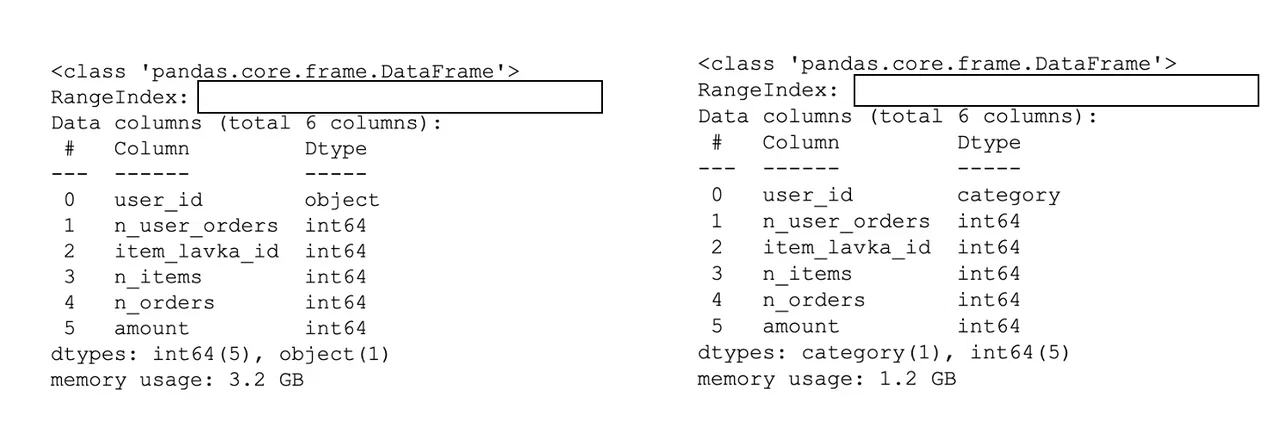


In [20]:
# Фильтры
ttn_global[ttn_global.Sex == 'male'].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,data_class,PassengerId
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train,NaN
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train,NaN
5,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,train,NaN
6,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,train,NaN
7,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,train,NaN


In [21]:
ttn_global[ttn_global['Age'] > 25].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,data_class,PassengerId
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train,NaN
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train,NaN
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train,NaN
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train,NaN
6,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,train,NaN


In [22]:
# fillna (помним про параметр inplace)
ttn_global.fillna({'Age': 18}).tail(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,data_class,PassengerId
1304,NaN,3,"Spector, Mr. Woolf",male,18.0,0,0,A.5. 3236,8.0500,NaN,S,test,1305.0
1305,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,test,1306.0
1306,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,test,1307.0
1307,NaN,3,"Ware, Mr. Frederick",male,18.0,0,0,359309,8.0500,NaN,S,test,1308.0
1308,NaN,3,"Peter, Master. Michael J",male,18.0,1,1,2668,22.3583,NaN,C,test,1309.0


In [23]:
# pd.Series.apply: для примнения функций к столбцам
ttn_global['Sex_new'] = ttn_global['Sex'].apply(lambda x: 1 if x == 'male' else 0)
ttn_global['Sex_new'].value_counts()

1    843
0    466
Name: Sex_new, dtype: int64

Использование типов данных из Pandas открывает перед вами широкие возможности (`.str`, `.cat`, `.dt`):

In [24]:
# pd.Series.str: векторизация строковых функций
ttn_global['Short_name'] = ttn_global['Name'].str.split(",").str[0]
ttn_global['First_symb_name'] = ttn_global['Name'].str.get(0)
ttn_global['Short_name'] = ttn_global['Short_name'].str.upper()

ttn_global[ttn_global['Name'].str.contains('Mrs')].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,data_class,PassengerId,Sex_new,Short_name,First_symb_name
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train,NaN,0,CUMINGS,C
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train,NaN,0,FUTRELLE,F
8,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,train,NaN,0,JOHNSON,J
9,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,train,NaN,0,NASSER,N
15,1.0,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S,train,NaN,0,HEWLETT,H


In [25]:
# pd.Series.cat: работа с категориями:
ttn_global['Pclass'].cat.categories
ttn_global['Pclass'].cat.rename_categories(list("abc"))
ttn_global['Pclass'].cat.add_categories(["d", "e"])
ttn_global['Embarked'].cat.codes

0       2
1       0
2       2
3       2
4       2
       ..
1304    2
1305    0
1306    2
1307    2
1308    0
Length: 1309, dtype: int8

### Predict future sales

Говорим про:
- datetime 
- merge 
- group by & простые агрегации

In [26]:
%%time
sales_train = pd.read_csv('future_sales/sales_train.csv')
sales_test = pd.read_csv('future_sales/test.csv')
sales_train.head(3)

CPU times: user 1.06 s, sys: 213 ms, total: 1.27 s
Wall time: 1.27 s


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.0,1.0
1,03.01.2013,0,25,2552,899.0,1.0
2,05.01.2013,0,25,2552,899.0,-1.0


In [27]:
sales_train['date'] = pd.to_datetime(sales_train['date'], format='%d.%m.%Y')
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0


In [28]:
sales_train.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype         
---  ------          -----         
 0   date            datetime64[ns]
 1   date_block_num  int64         
 2   shop_id         int64         
 3   item_id         int64         
 4   item_price      float64       
 5   item_cnt_day    float64       
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 134.4 MB


Работа напрямую через datetime позволяет избежать множества костылей. 
"Справочник" по `.dt`: https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#dt-accessor

In [29]:
sales_train['date'].dt.day
sales_train['date'].dt.month
sales_train['date'].dt.is_month_start
sales_train['date'].dt.dayofweek

0          2
1          3
2          5
3          6
4          1
          ..
2935844    5
2935845    4
2935846    2
2935847    3
2935848    5
Name: date, Length: 2935849, dtype: int64

In [30]:
items = pd.read_csv('future_sales/items.csv')
item_categories = pd.read_csv('future_sales/item_categories.csv')
shops = pd.read_csv('future_sales/shops.csv')


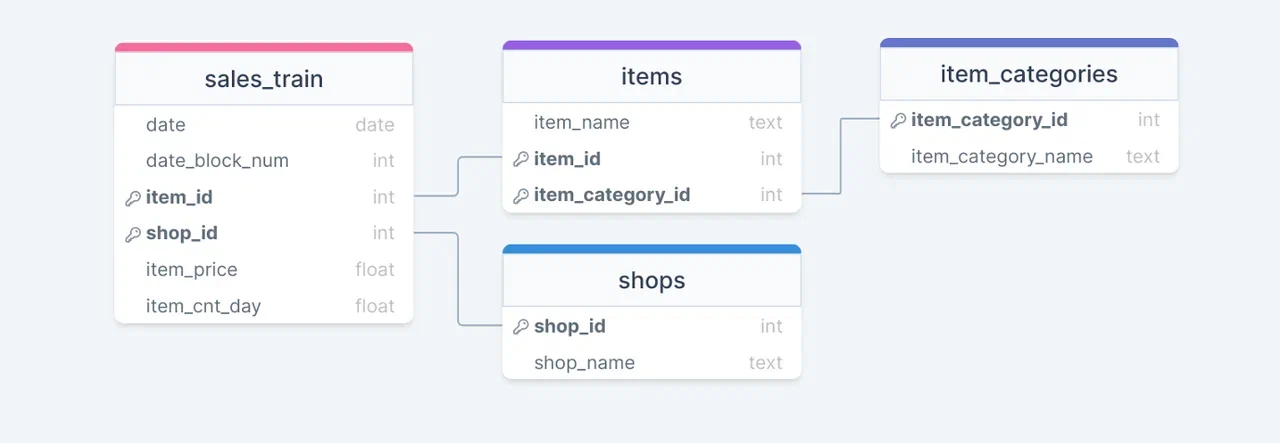


In [31]:
sales_tr = (
    sales_train
    .merge(items, on='item_id')
    .merge(item_categories, on='item_category_id')
    .merge(shops, on='shop_id')
)

sales_tst = (
    sales_test
    .merge(items, on='item_id')
    .merge(item_categories, on='item_category_id')
    .merge(shops, on='shop_id')
)

sales_global = pd.concat(
    [sales_tr.assign(data_class='train'), sales_tst.assign(data_class='test')],
    axis=0,
    sort=False,
    ignore_index=True
)

sales_global.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name,data_class,ID
0,2013-01-02,0.0,59,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир""",train,NaN
1,2013-04-26,3.0,59,944,150.0,1.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир""",train,NaN
2,2013-06-26,5.0,59,944,199.5,1.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир""",train,NaN
3,2013-07-20,6.0,59,944,199.5,1.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир""",train,NaN
4,2013-09-14,8.0,59,944,299.0,2.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир""",train,NaN


In [32]:
sales_global.shop_name.value_counts().head()

Москва ТЦ "Семеновский"            240736
Москва ТРК "Атриум"                191204
Москва ТЦ "МЕГА Теплый Стан" II    147334
Химки ТЦ "Мега"                    143480
Якутск Орджоникидзе, 56            122528
Name: shop_name, dtype: int64

In [33]:
(
    sales_global
    .groupby('item_name')
    .agg({'item_cnt_day': 'sum'})
    .sort_values(by='item_cnt_day', ascending = False)
)

,item_cnt_day
item_name,
Фирменный пакет майка 1С Интерес белый (34*42) 45 мкм,187642.0
"Diablo III [PC, Jewel, русская версия]",17245.0
"Grand Theft Auto V [PS3, русские субтитры]",16642.0
Прием денежных средств для 1С-Онлайн,15830.0
Playstation Store пополнение бумажника: Карта оплаты 1000 руб.,14515.0
...,...
Мягкая игрушка Смеющаяся обезьяна Интерактивная,0.0
Комплект «Sony PS3 (320 Gb) (CECH-2508B) + игра «FIFA 12»,-1.0
Змея,-1.0


In [34]:
(
    sales_global
    .assign(sales_rub = sales_global.item_price * sales_global.item_cnt_day)
    .groupby('shop_name')
    .agg({'sales_rub': np.sum, 'item_name': pd.Series.nunique})
    .reset_index()
    .rename(columns={'sales_rub': 'sales_sum', 'item_name': 'sku_unique'})
    .sort_values(by='sales_sum', ascending = False)
    .head()
)

,shop_name,sales_sum,sku_unique
31,"Москва ТЦ ""Семеновский""",2.352170e+08,15594
25,"Москва ТРК ""Атриум""",2.164806e+08,16454
28,"Москва ТЦ ""МЕГА Теплый Стан"" II",1.597463e+08,14052
42,"СПб ТК ""Невский Центр""",1.519170e+08,13430
54,"Химки ТЦ ""Мега""",1.419397e+08,13863


### Итого, имеем два датасета - маленький Titanic и большой Future sales

In [35]:
ttn_global.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,data_class,PassengerId,Sex_new,Short_name,First_symb_name
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train,NaN,1,BRAUND,B
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train,NaN,0,CUMINGS,C
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train,NaN,0,HEIKKINEN,H


In [36]:
ttn_global.shape

(1309, 16)

In [37]:
sales_global.head(3)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name,data_class,ID
0,2013-01-02,0.0,59,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир""",train,NaN
1,2013-04-26,3.0,59,944,150.0,1.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир""",train,NaN
2,2013-06-26,5.0,59,944,199.5,1.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир""",train,NaN


In [38]:
sales_global.shape

(3150049, 12)

## Some tips...

In [61]:
pd.options.display.max_columns = 4

In [62]:
sales_global.head(3)

,date,date_block_num,...,data_class,ID
0,2013-01-02,0.0,...,train,NaN
1,2013-04-26,3.0,...,train,NaN
2,2013-06-26,5.0,...,train,NaN


In [63]:
pd.options.display.max_columns = 20

In [64]:
sales_global.head(3)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name,data_class,ID
0,2013-01-02,0.0,59,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир""",train,NaN
1,2013-04-26,3.0,59,944,150.0,1.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир""",train,NaN
2,2013-06-26,5.0,59,944,199.5,1.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир""",train,NaN


In [65]:
pd.options.display.max_columns = None

In [66]:
sales_global.head(3)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name,data_class,ID
0,2013-01-02,0.0,59,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир""",train,NaN
1,2013-04-26,3.0,59,944,150.0,1.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир""",train,NaN
2,2013-06-26,5.0,59,944,199.5,1.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир""",train,NaN


In [67]:
pd.options.display.max_rows

60